In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.util import ngrams
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import gensim.downloader as api
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df=pd.read_csv("mental_health.csv")
df

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1
...,...,...
27972,posting everyday people stop caring religion ...,0
27973,okay definetly need hear guys opinion ive pret...,0
27974,cant get dog think ill kill myselfthe last thi...,1
27975,whats point princess bridei really think like ...,1


In [ ]:
df.shape

(27977, 2)

In [ ]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [ ]:
# Compter le nombre total de lignes dupliquées
total_duplicates = df.duplicated().sum()

# Afficher le nombre total de lignes dupliquées dans le DataFrame
print("Nombre total de lignes dupliquées : ", total_duplicates)

Nombre total de lignes dupliquées :  5


In [ ]:
# Supprimer les duplicatas
df = df.drop_duplicates()

In [ ]:
# Vérifier les lignes dupliquées
total_duplicates = df.duplicated().sum()
print("Nombre total de lignes dupliquées : ", total_duplicates)

Nombre total de lignes dupliquées :  0


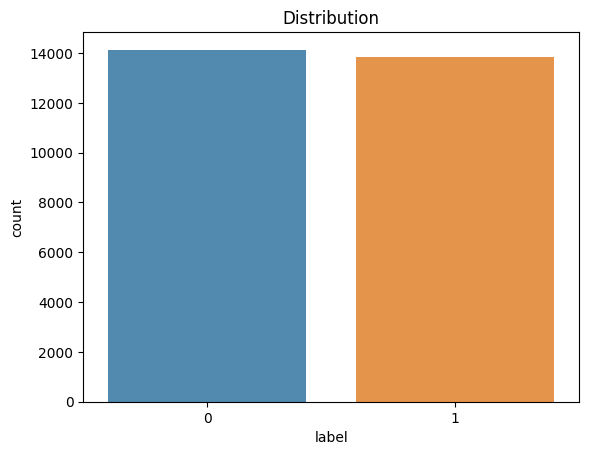

In [ ]:
count=df['label'].value_counts().index
plt.title('Distribution')
ax = sns.countplot(x='label', data=df,  order=count,alpha=0.85)

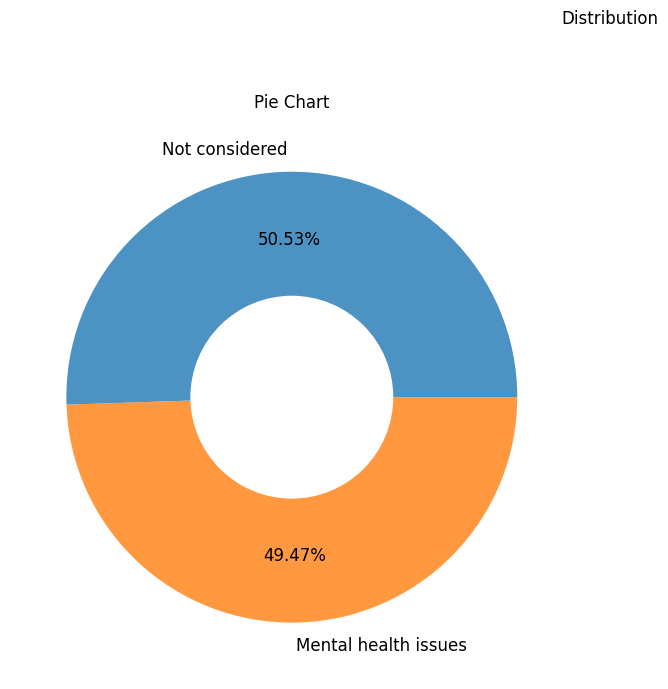

In [ ]:
# Définir les labels pour le graphique en camembert
labels = ['Not considered', 'Mental health issues']

# Créer une figure avec une taille de 16x8 pouces
plt.figure(figsize=(16, 8))

# Ajouter un titre principal à la figure
plt.suptitle('Distribution')

# --- Graphique en camembert ---
# Ajouter un sous-plot pour le graphique en camembert
plt.subplot(1, 2, 1)

# Ajouter un titre pour le graphique en camembert
plt.title('Pie Chart')

# Utiliser la méthode .pie() pour tracer le graphique en camembert et spécifier les arguments
plt.pie(df['label'].value_counts(), labels=labels, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8),
        textprops={'fontsize':12})

# Ajouter un cercle au centre du graphique en camembert pour créer un trou
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

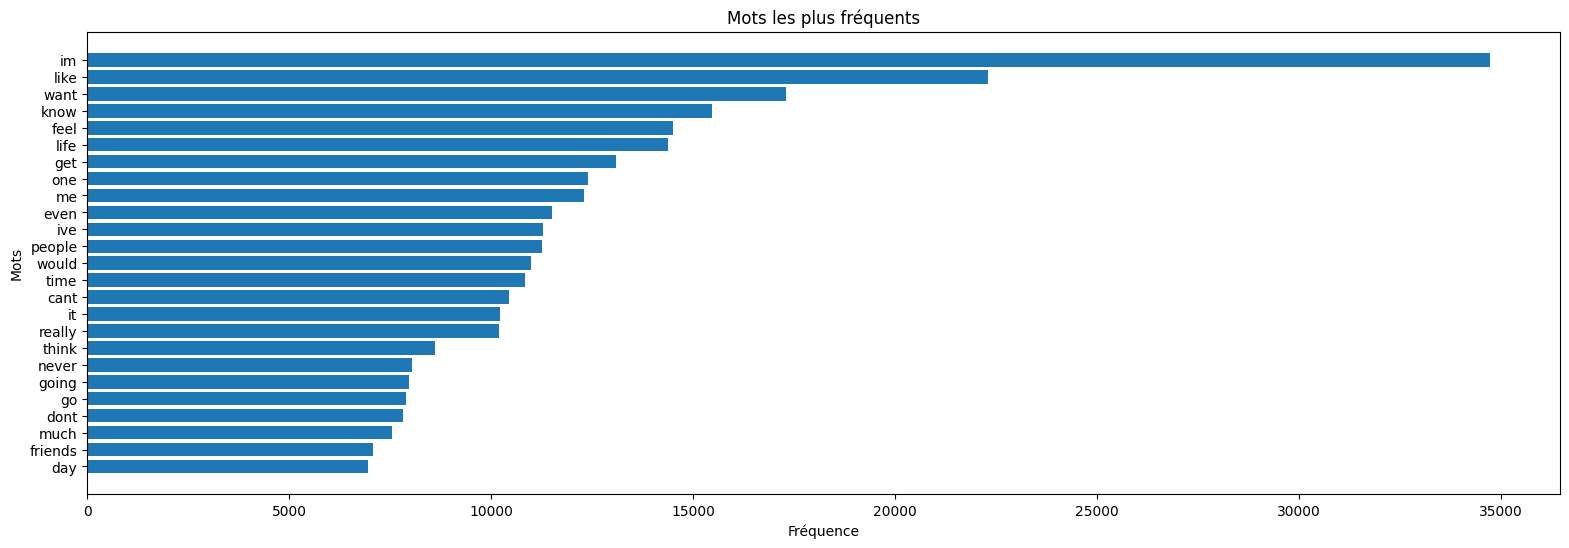

In [ ]:
from collections import Counter
all_text = ' '.join(df['text'])

# Divisez le texte en mots
words = all_text.split()

# Comptez la fréquence de chaque mot
word_counts = Counter(words)

# Triez les mots par fréquence
most_common_words = word_counts.most_common(25)

# Créez un DataFrame à partir des mots les plus fréquents
df1 = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Affichez un graphique à barres
plt.figure(figsize=(19, 6))
plt.barh(df1['Word'], df1['Frequency'])
plt.xlabel("Fréquence")
plt.ylabel("Mots")
plt.title("Mots les plus fréquents")
plt.gca().invert_yaxis()  # Inverser l'ordre des mots
plt.show()

les mots les plus fréquents pour label 0
# **Non considéré**

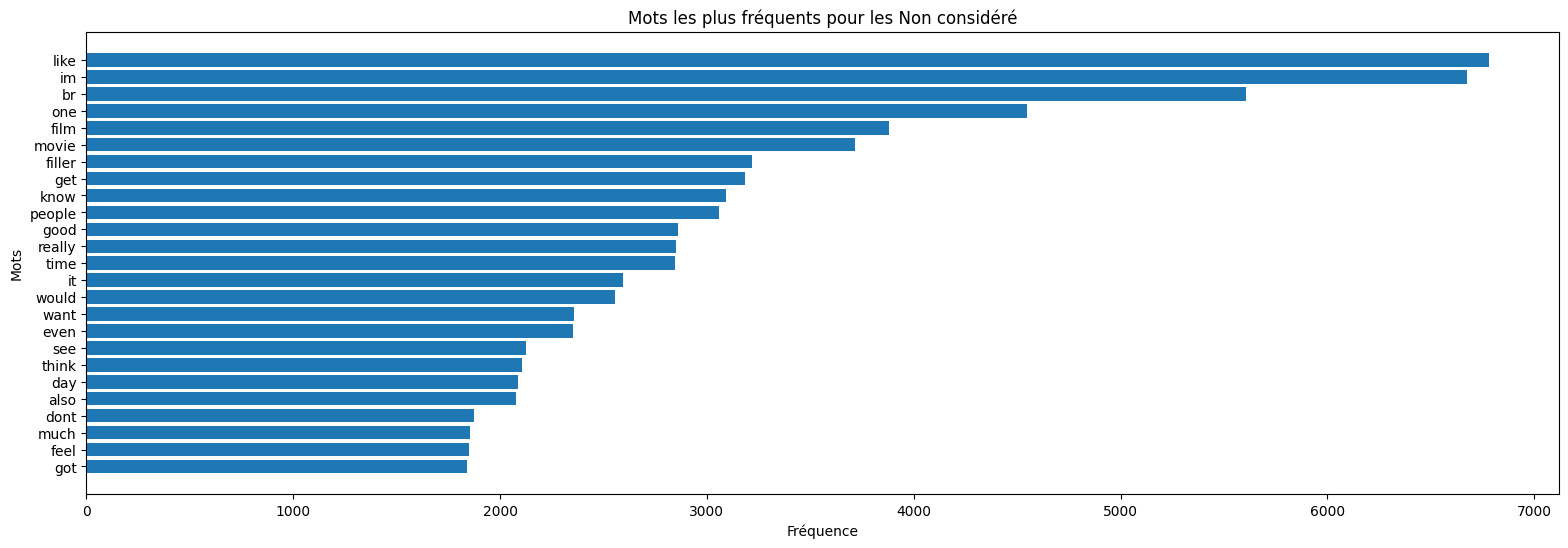

In [ ]:
all_text = ' '.join(df[df['label'] == 0]['text'])

# Divisez le texte en mots
words = all_text.split()

# Comptez la fréquence de chaque mot
word_counts = Counter(words)

# Triez les mots par fréquence
most_common_words = word_counts.most_common(25)

# Créez un DataFrame à partir des mots les plus fréquents
df1 = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Affichez un graphique à barres
plt.figure(figsize=(19, 6))
plt.barh(df1['Word'], df1['Frequency'])
plt.xlabel("Fréquence")
plt.ylabel("Mots")
plt.title("Mots les plus fréquents pour les Non considéré")
plt.gca().invert_yaxis()  # Inverser l'ordre des mots
plt.show()

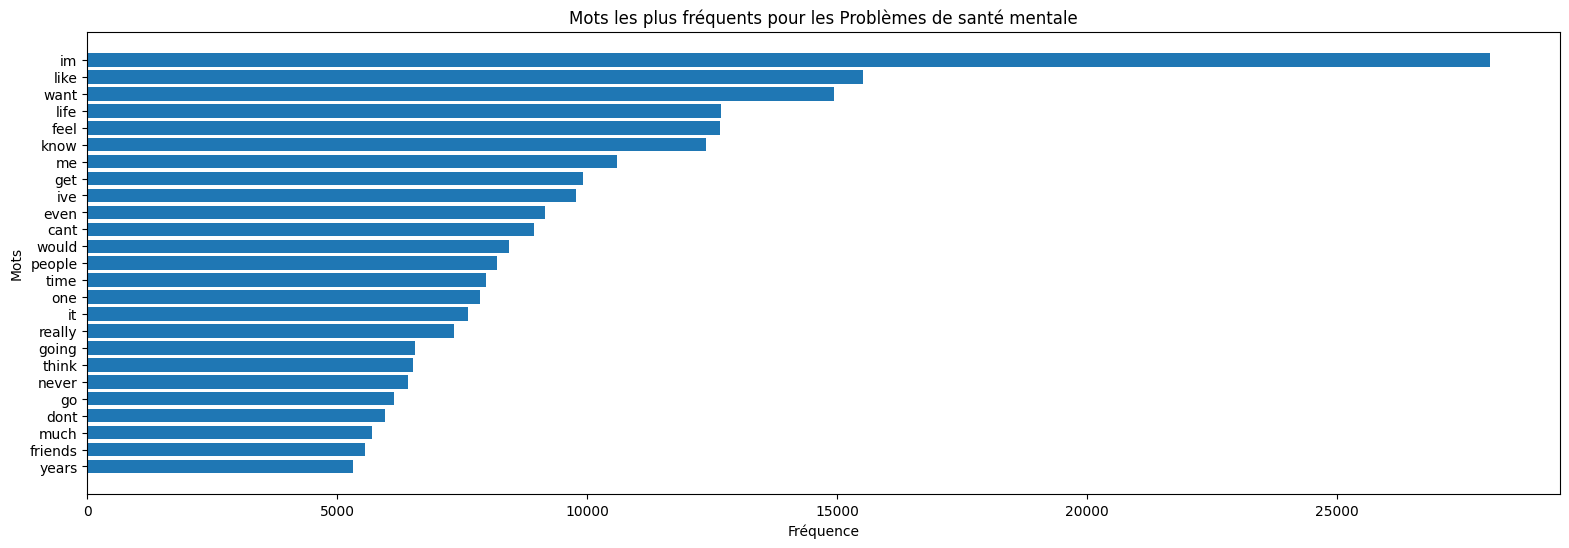

In [ ]:
all_text = ' '.join(df[df['label'] == 1]['text'])

# Divisez le texte en mots
words = all_text.split()

# Comptez la fréquence de chaque mot
word_counts = Counter(words)

# Triez les mots par fréquence
most_common_words = word_counts.most_common(25)

# Créez un DataFrame à partir des mots les plus fréquents
df1 = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Affichez un graphique à barres
plt.figure(figsize=(19, 6))
plt.barh(df1['Word'], df1['Frequency'])
plt.xlabel("Fréquence")
plt.ylabel("Mots")
plt.title("Mots les plus fréquents pour les Problèmes de santé mentale")
plt.gca().invert_yaxis()  # Inverser l'ordre des mots
plt.show()

In [ ]:
df['text'][1]

'nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself'

In [ ]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

In [ ]:
df['text_without_stopwords'] = df['text'].apply(remove_stopwords)

<ipython-input-47-eaa7ffb94405>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_without_stopwords'] = df['text'].apply(remove_stopwords)


In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    words = word_tokenize(text)  # Tokenize the text using word_tokenize
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)
df['lemmatized_text'] = df['text_without_stopwords'].apply(lemmatize_text)


<ipython-input-48-af6fca28b12f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lemmatized_text'] = df['text_without_stopwords'].apply(lemmatize_text)


In [ ]:
# Define functions for word and sentence tokenization
def tokenize_words(text):
    return word_tokenize(text)
# Apply tokenization to the DataFrame
df['word_tokens'] = df['lemmatized_text'].apply(lambda x: tokenize_words(x))

<ipython-input-49-ff2f1060df15>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_tokens'] = df['lemmatized_text'].apply(lambda x: tokenize_words(x))


In [ ]:
msg=df['lemmatized_text'].apply(lambda line:[token for token in word_tokenize(line) if len(token)>2]).apply(lambda y:" ".join(y))
df['tokenize_words']=msg

<ipython-input-50-82ef2a8a3468>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenize_words']=msg


In [ ]:
df

,text,label,text_without_stopwords,lemmatized_text,word_tokens,tokenize_words
0,dear american teens question dutch person hear...,0,dear american teens question dutch person hear...,dear american teen question dutch person heard...,"[dear, american, teen, question, dutch, person...",dear american teen question dutch person heard...
1,nothing look forward lifei dont many reasons k...,1,nothing look forward lifei dont many reasons k...,nothing look forward lifei dont many reason ke...,"[nothing, look, forward, lifei, dont, many, re...",nothing look forward lifei dont many reason ke...
2,music recommendations im looking expand playli...,0,music recommendations im looking expand playli...,music recommendation im looking expand playlis...,"[music, recommendation, im, looking, expand, p...",music recommendation looking expand playlist u...
3,im done trying feel betterthe reason im still ...,1,im done trying feel betterthe reason im still ...,im done trying feel betterthe reason im still ...,"[im, done, trying, feel, betterthe, reason, im...",done trying feel betterthe reason still alive ...
4,worried year old girl subject domestic physic...,1,worried year old girl subject domestic physica...,worried year old girl subject domestic physica...,"[worried, year, old, girl, subject, domestic, ...",worried year old girl subject domestic physica...
...,...,...,...,...,...,...
27972,posting everyday people stop caring religion ...,0,posting everyday people stop caring religion m...,posting everyday people stop caring religion m...,"[posting, everyday, people, stop, caring, reli...",posting everyday people stop caring religion m...
27973,okay definetly need hear guys opinion ive pret...,0,okay definetly need hear guys opinion ive pret...,okay definetly need hear guy opinion ive prett...,"[okay, definetly, need, hear, guy, opinion, iv...",okay definetly need hear guy opinion ive prett...
27974,cant get dog think ill kill myselfthe last thi...,1,cant get dog think ill kill myselfthe last thi...,cant get dog think ill kill myselfthe last thi...,"[cant, get, dog, think, ill, kill, myselfthe, ...",cant get dog think ill kill myselfthe last thi...
27975,whats point princess bridei really think like ...,1,whats point princess bridei really think like ...,whats point princess bridei really think like ...,"[whats, point, princess, bridei, really, think...",whats point princess bridei really think like ...


In [ ]:
# Function to generate n-grams
def generate_ngrams(tokens, n):
    n_grams = ngrams(tokens, n)
    return [' '.join(gram) for gram in n_grams]

# Specify the desired value of 'n' for n-grams
n = 2  # Change this value to generate different n-grams (e.g., bigrams, trigrams)

# Generate and add n-grams to the DataFrame
df['word_ngrams'] = df['word_tokens'].apply(lambda x: generate_ngrams(x, n))

# Display the DataFrame
df.head()

<ipython-input-52-7047c0fc6091>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_ngrams'] = df['word_tokens'].apply(lambda x: generate_ngrams(x, n))


,text,label,text_without_stopwords,lemmatized_text,word_tokens,tokenize_words,word_ngrams
0,dear american teens question dutch person hear...,0,dear american teens question dutch person hear...,dear american teen question dutch person heard...,"[dear, american, teen, question, dutch, person...",dear american teen question dutch person heard...,"[dear american, american teen, teen question, ..."
1,nothing look forward lifei dont many reasons k...,1,nothing look forward lifei dont many reasons k...,nothing look forward lifei dont many reason ke...,"[nothing, look, forward, lifei, dont, many, re...",nothing look forward lifei dont many reason ke...,"[nothing look, look forward, forward lifei, li..."
2,music recommendations im looking expand playli...,0,music recommendations im looking expand playli...,music recommendation im looking expand playlis...,"[music, recommendation, im, looking, expand, p...",music recommendation looking expand playlist u...,"[music recommendation, recommendation im, im l..."
3,im done trying feel betterthe reason im still ...,1,im done trying feel betterthe reason im still ...,im done trying feel betterthe reason im still ...,"[im, done, trying, feel, betterthe, reason, im...",done trying feel betterthe reason still alive ...,"[im done, done trying, trying feel, feel bette..."
4,worried year old girl subject domestic physic...,1,worried year old girl subject domestic physica...,worried year old girl subject domestic physica...,"[worried, year, old, girl, subject, domestic, ...",worried year old girl subject domestic physica...,"[worried year, year old, old girl, girl subjec..."


In [ ]:
df['text'][1]

'nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself'

In [ ]:

df['word_ngrams'][1]

['nothing look',
 'look forward',
 'forward lifei',
 'lifei dont',
 'dont many',
 'many reason',
 'reason keep',
 'keep going',
 'going feel',
 'feel like',
 'like nothing',
 'nothing keep',
 'keep going',
 'going next',
 'next day',
 'day make',
 'make want',
 'want hang']

In [ ]:
y=df['label'].values
y

array([0, 1, 0, ..., 1, 1, 0])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['tokenize_words'] ,y,test_size=0.3,random_state=1)

In [ ]:
# Initialize a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'text' column into TF-IDF features
tfidf_features = tfidf_vectorizer.fit_transform(x_train)
X_test_vec = tfidf_vectorizer.transform(x_test)
# Convert the features to a dense array
tfidf_features_array = tfidf_features.toarray()

In [ ]:
sv=SVC()
sv.fit(tfidf_features,y_train)
y_pred_train = sv.predict(tfidf_features)
y_pred=sv.predict(X_test_vec)
print('SVC Model')
print(classification_report(y_test,y_pred))

SVC Model
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      4271
           1       0.93      0.90      0.92      4121

    accuracy                           0.92      8392
   macro avg       0.92      0.92      0.92      8392
weighted avg       0.92      0.92      0.92      8392



Train Accuracy: 0.9886108273748723


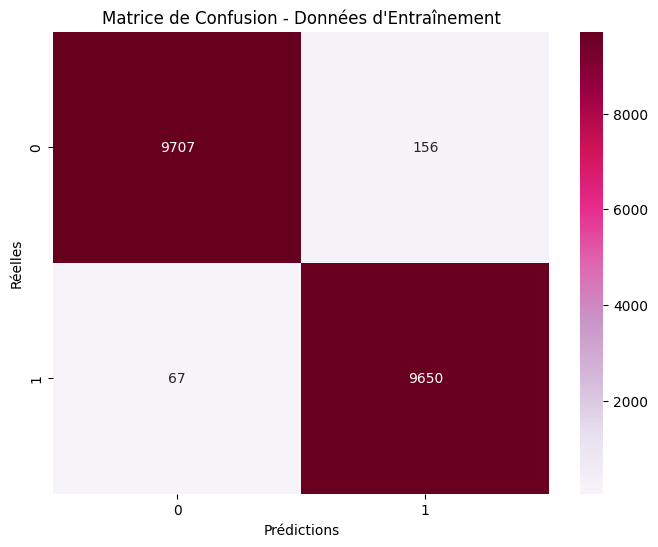

In [ ]:
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Train Accuracy: {accuracy_train}')
# Calculer la matrice de confusion
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

# Afficher la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='PuRd', xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
plt.title('Matrice de Confusion - Données d\'Entraînement')
plt.xlabel('Prédictions')
plt.ylabel('Réelles')
plt.show()

.:. SVC Accuracy: 91.87% .:.


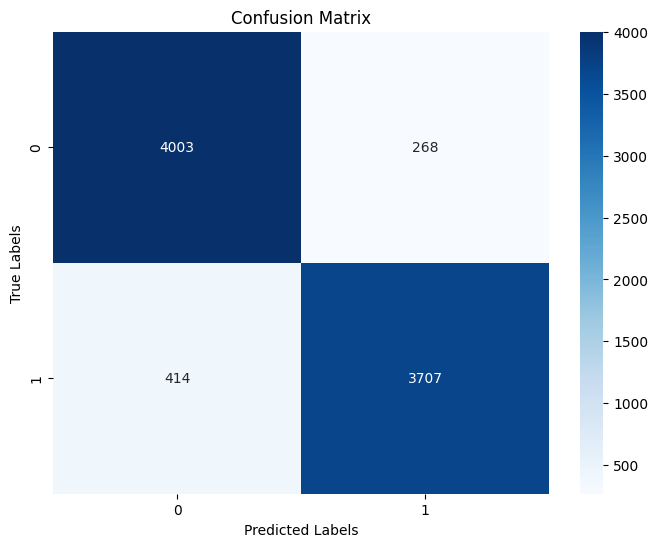

In [ ]:

SVcAcc1 = accuracy_score(y_pred, y_test)
print('.:. SVC Accuracy:'+'\033[1m {:.2f}%'.format(SVcAcc1*100)+' .:.')
conf_matrix = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion à l'aide d'une heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
RD=RandomForestClassifier()
print(RD)
RD.fit(tfidf_features,y_train)
y_pred_train = RD.predict(tfidf_features)
y_pred=RD.predict(X_test_vec)
print(classification_report(y_test,y_pred))

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      4271
           1       0.89      0.89      0.89      4121

    accuracy                           0.89      8392
   macro avg       0.89      0.89      0.89      8392
weighted avg       0.89      0.89      0.89      8392



Train Accuracy: 0.9999489274770174


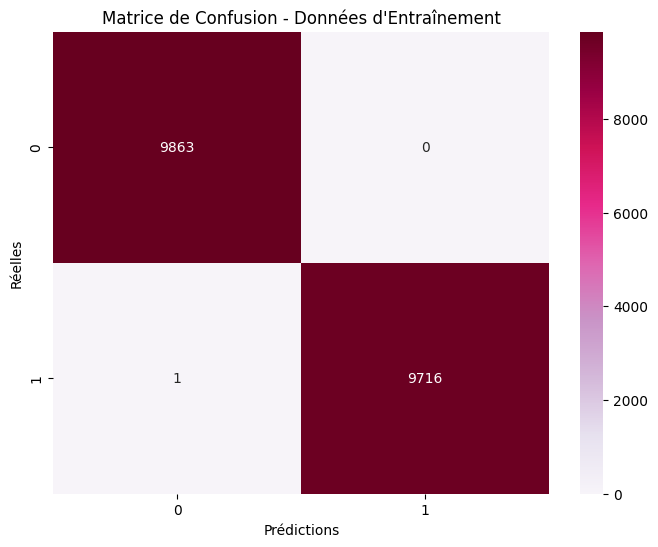

In [ ]:
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Train Accuracy: {accuracy_train}')# Calculer la matrice de confusion
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

# Afficher la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='PuRd', xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
plt.title('Matrice de Confusion - Données d\'Entraînement')
plt.xlabel('Prédictions')
plt.ylabel('Réelles')
plt.show()

.:. SRandomForestClassifier: 89.03% .:.


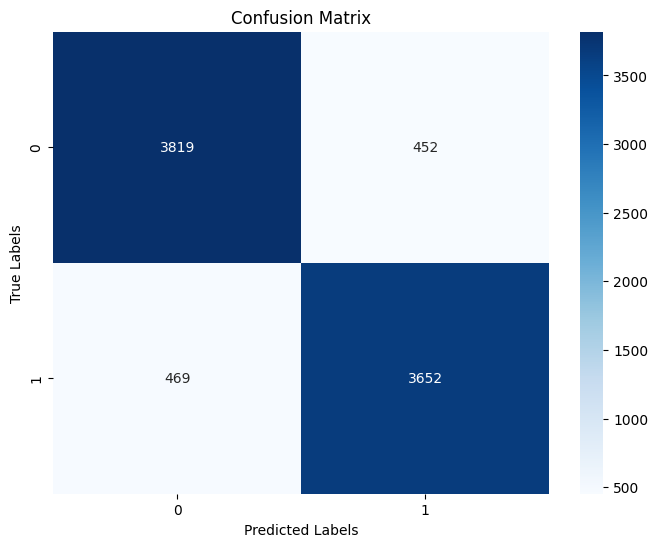

In [ ]:

RDAcc1 = accuracy_score(y_pred, y_test)
print('.:. SRandomForestClassifier:'+'\033[1m {:.2f}%'.format(RDAcc1*100)+' .:.')
conf_matrix = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion à l'aide d'une heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
AB=AdaBoostClassifier()
print(AB)
AB.fit(tfidf_features,y_train)
y_pred_train = AB.predict(tfidf_features)
y_pred=AB.predict(X_test_vec)
print(classification_report(y_test,y_pred))

AdaBoostClassifier()
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4271
           1       0.90      0.82      0.86      4121

    accuracy                           0.87      8392
   macro avg       0.87      0.87      0.87      8392
weighted avg       0.87      0.87      0.87      8392



Train Accuracy: 0.8782941777323799


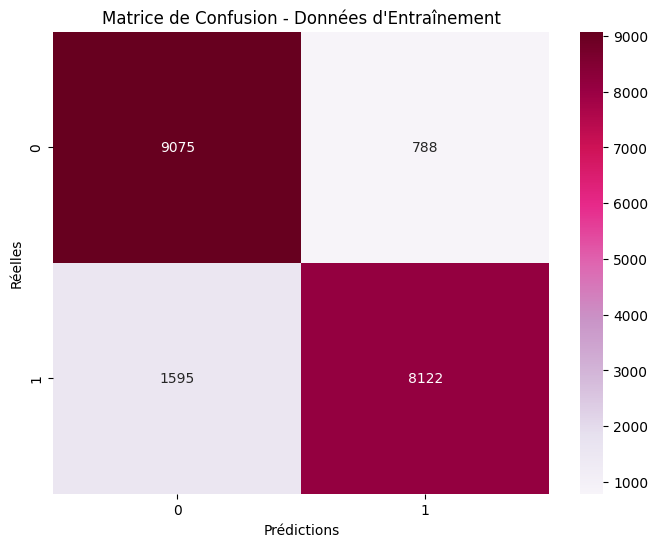

In [ ]:
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Train Accuracy: {accuracy_train}')
# Calculer la matrice de confusion
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

# Afficher la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='PuRd', xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
plt.title('Matrice de Confusion - Données d\'Entraînement')
plt.xlabel('Prédictions')
plt.ylabel('Réelles')
plt.show()

.:. AdaBoostClassifier: 86.89% .:.


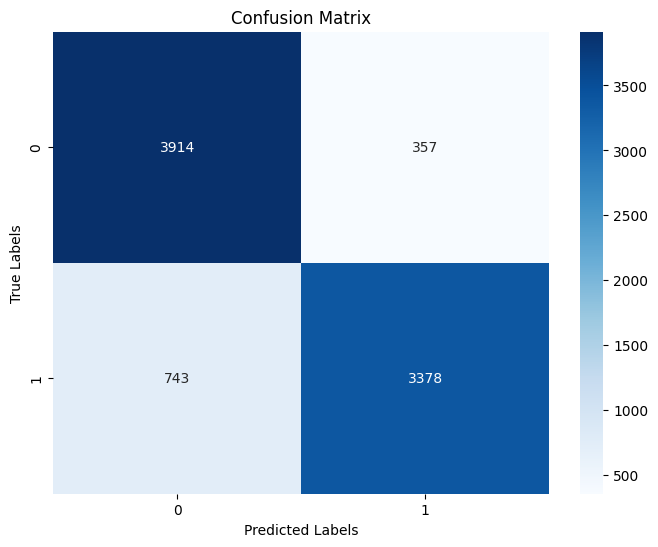

In [ ]:
# --- SVM Accuracy ---
ABAcc1 = accuracy_score(y_pred, y_test)
print('.:. AdaBoostClassifier:'+'\033[1m {:.2f}%'.format(ABAcc1*100)+' .:.')
conf_matrix = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion à l'aide d'une heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
y_new=sv.predict(tfidf_vectorizer.transform(["im done trying feel betterthe reason "]))
if y_new==1:
    print("positive")
if y_new==0:
    print("negative")

positive


In [ ]:
# Load a pre-trained Word2Vec model
w2v_model = api.load("word2vec-google-news-300")
# Initialize an empty matrix for word embeddings
embedding_matrix = []
# Iterate over the 'text' column in the DataFrame
for doc in x_train:
    doc_vector = [w2v_model[word] for word in doc if word in w2v_model]
    if doc_vector:
        doc_mean_vector = sum(doc_vector) / len(doc_vector)
        embedding_matrix.append(doc_mean_vector)
    else:
        # Handle cases where no words in the document are in the Word2Vec model's vocabulary
        embedding_matrix.append([0] * 300)  # Use a zero vector
# Convert the embedding matrix to a numpy array
embedding_matrix = np.array(embedding_matrix)

In [ ]:
embedding_matrix_test = []
for doc in x_test:
    doc_vector = [w2v_model[word] for word in doc if word in w2v_model]
    if doc_vector:
        doc_mean_vector = sum(doc_vector) / len(doc_vector)
        embedding_matrix_test.append(doc_mean_vector)
    else:
        # Handle cases where no words in the document are in the Word2Vec model's vocabulary
        embedding_matrix.append([0] * 300)  # Use a zero vector
# Convert the embedding matrix to a numpy array
embedding_matrix_test = np.array(embedding_matrix_test)

In [ ]:
sv=SVC()
sv.fit(embedding_matrix,y_train)
y_pred=sv.predict(embedding_matrix_test)
y_pred_train = sv.predict(embedding_matrix)
print('SVC Model')
print(classification_report(y_test,y_pred))

SVC Model
              precision    recall  f1-score   support

           0       0.80      0.63      0.70      4271
           1       0.68      0.84      0.75      4121

    accuracy                           0.73      8392
   macro avg       0.74      0.73      0.73      8392
weighted avg       0.75      0.73      0.73      8392



Train Accuracy: 0.7394279877425944


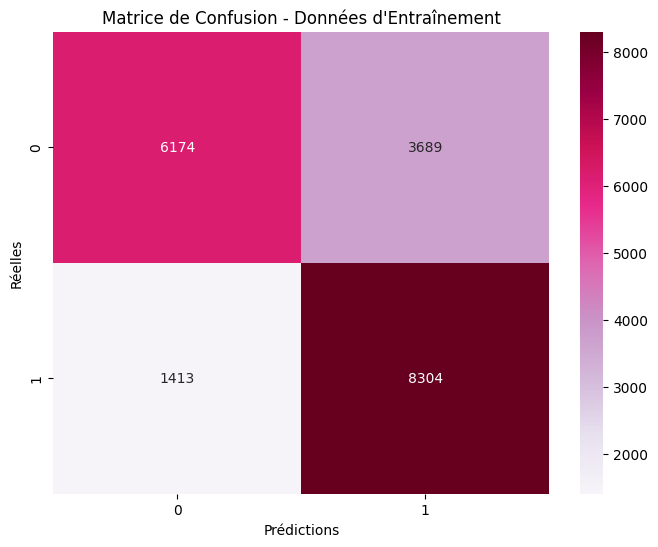

In [ ]:
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Train Accuracy: {accuracy_train}')
# Calculer la matrice de confusion
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

# Afficher la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='PuRd', xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
plt.title('Matrice de Confusion - Données d\'Entraînement')
plt.xlabel('Prédictions')
plt.ylabel('Réelles')
plt.show()

.:. SVC Accuracy: 73.16% .:.


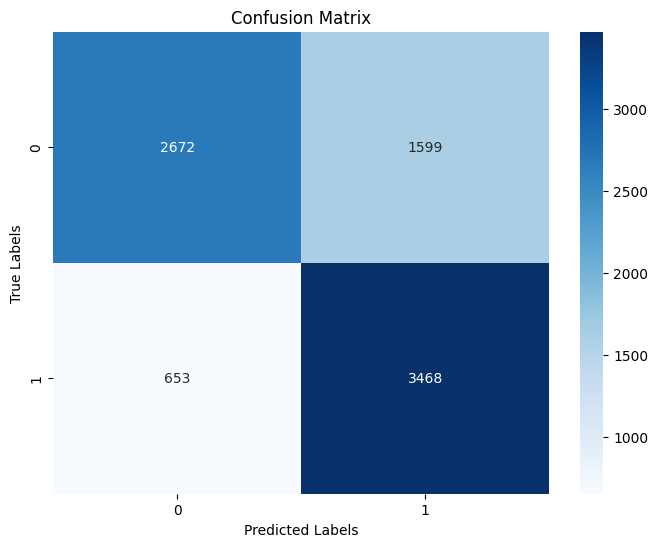

In [ ]:

SVCAcc2 = accuracy_score(y_pred, y_test)
print('.:. SVC Accuracy:'+'\033[1m {:.2f}%'.format(SVCAcc2*100)+' .:.')
conf_matrix = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion à l'aide d'une heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
print(RD)
RD.fit(embedding_matrix,y_train)
y_pred_train = RD.predict(embedding_matrix)
y_pred=RD.predict(embedding_matrix_test)
print(classification_report(y_test,y_pred))

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.74      0.83      0.79      4271
           1       0.80      0.70      0.75      4121

    accuracy                           0.77      8392
   macro avg       0.77      0.77      0.77      8392
weighted avg       0.77      0.77      0.77      8392



Train Accuracy: 0.9999489274770174


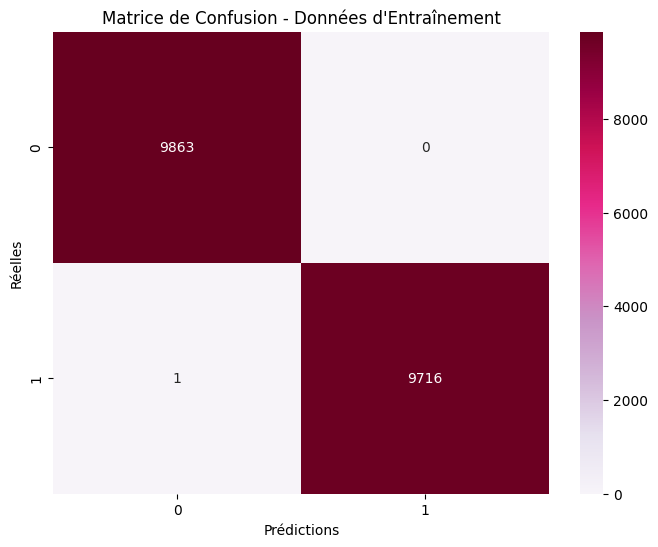

In [ ]:
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Train Accuracy: {accuracy_train}')
# Calculer la matrice de confusion
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

# Afficher la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='PuRd', xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
plt.title('Matrice de Confusion - Données d\'Entraînement')
plt.xlabel('Prédictions')
plt.ylabel('Réelles')
plt.show()

.:. RandomForestClassifier: 76.81% .:.


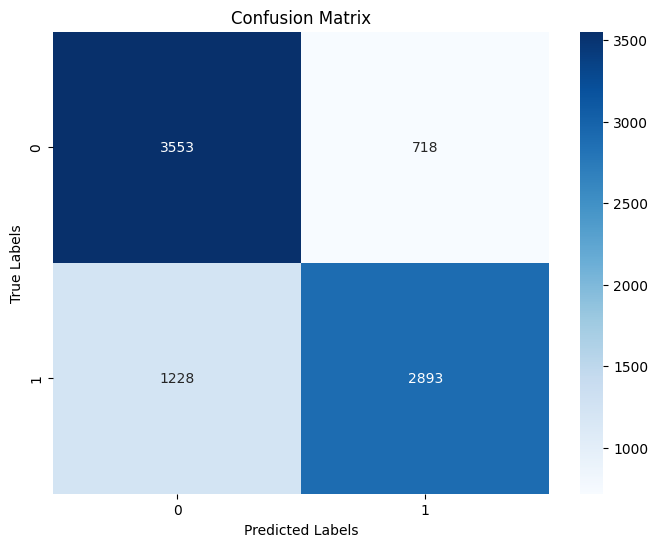

In [ ]:

RDAcc2 = accuracy_score(y_pred, y_test)
print('.:. RandomForestClassifier:'+'\033[1m {:.2f}%'.format(RDAcc2*100)+' .:.')
conf_matrix = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion à l'aide d'une heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
print(AB)
AB.fit(embedding_matrix,y_train)
y_pred_train = AB.predict(embedding_matrix)
y_pred=AB.predict(embedding_matrix_test)
print(classification_report(y_test,y_pred))

AdaBoostClassifier()
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      4271
           1       0.75      0.76      0.76      4121

    accuracy                           0.76      8392
   macro avg       0.76      0.76      0.76      8392
weighted avg       0.76      0.76      0.76      8392



Train Accuracy: 0.7719101123595505


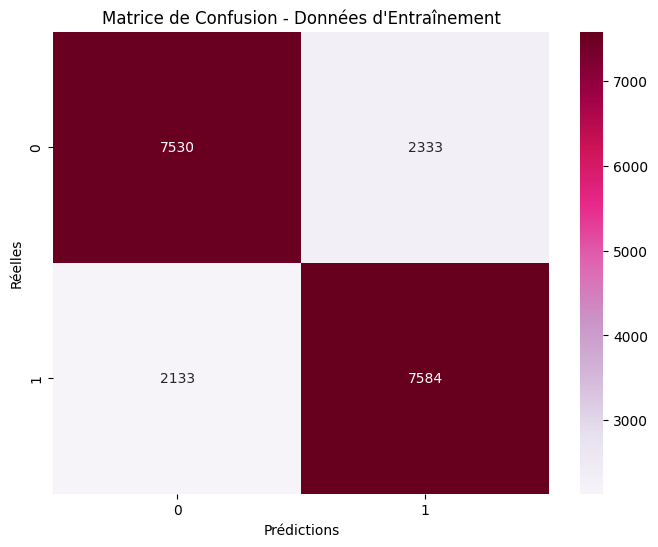

In [ ]:
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Train Accuracy: {accuracy_train}')
# Calculer la matrice de confusion
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

# Afficher la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='PuRd', xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
plt.title('Matrice de Confusion - Données d\'Entraînement')
plt.xlabel('Prédictions')
plt.ylabel('Réelles')
plt.show()

.:. AdaBoostClassifier Accuracy: 75.70% .:.


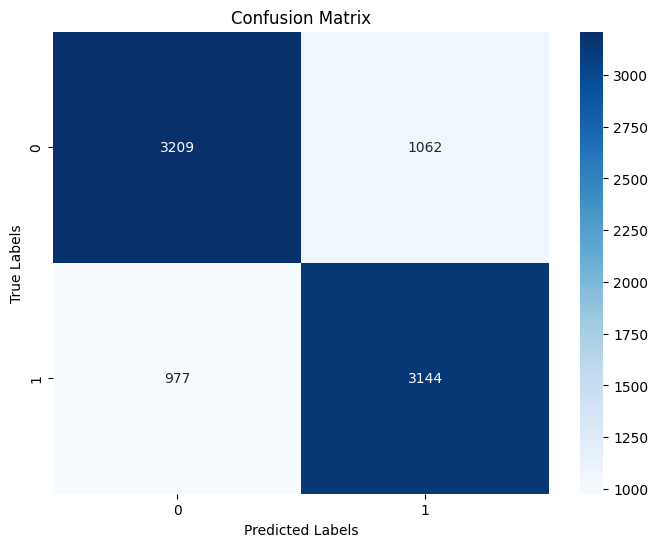

In [ ]:

ABAcc2 = accuracy_score(y_pred, y_test)
print('.:. AdaBoostClassifier Accuracy:'+'\033[1m {:.2f}%'.format(ABAcc2*100)+' .:.')
conf_matrix = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion à l'aide d'une heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # You can adjust the n-gram range as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
X_test_tfidf = tfidf_vectorizer.transform(x_test)

In [ ]:
sv=SVC()
sv.fit(X_train_tfidf,y_train)
y_pred_train = sv.predict(X_train_tfidf)
y_pred=sv.predict(X_test_tfidf)

print('SVC Model')
print(classification_report(y_test,y_pred))

SVC Model
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      4271
           1       0.91      0.92      0.91      4121

    accuracy                           0.92      8392
   macro avg       0.92      0.92      0.92      8392
weighted avg       0.92      0.92      0.92      8392



Train Accuracy: 0.9957609805924412


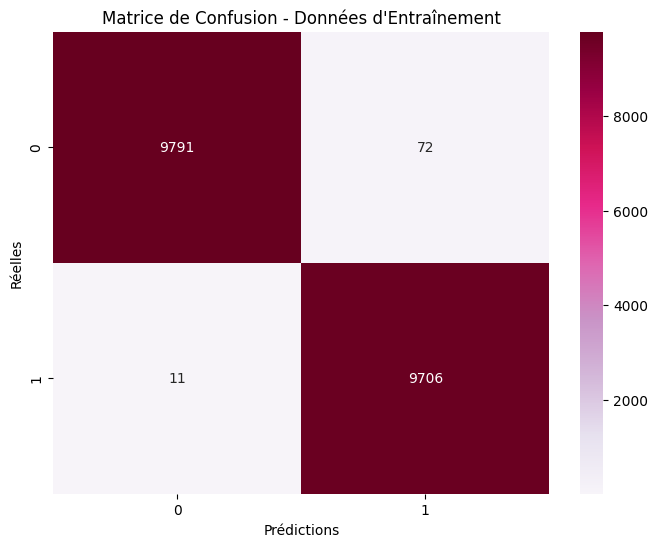

In [ ]:
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Train Accuracy: {accuracy_train}')
# Calculer la matrice de confusion
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

# Afficher la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='PuRd', xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
plt.title('Matrice de Confusion - Données d\'Entraînement')
plt.xlabel('Prédictions')
plt.ylabel('Réelles')
plt.show()

.:. SVC Accuracy: 91.59% .:.


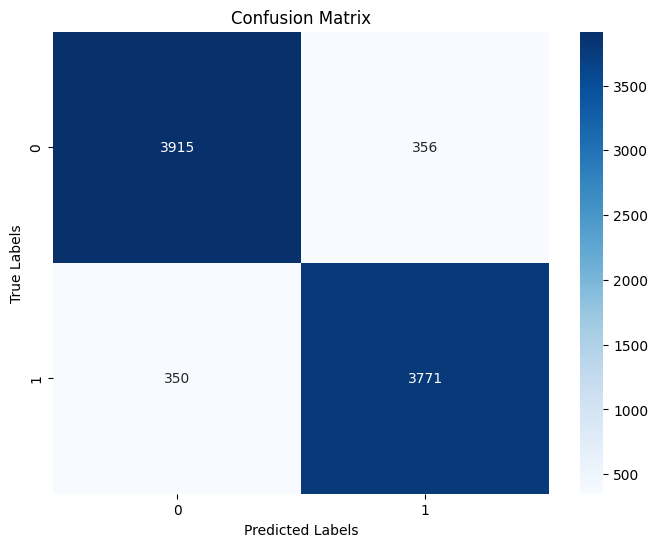

In [ ]:

SVcAcc3 = accuracy_score(y_pred, y_test)
print('.:. SVC Accuracy:'+'\033[1m {:.2f}%'.format(SVcAcc3*100)+' .:.')
conf_matrix = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion à l'aide d'une heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
RD=RandomForestClassifier()
print(RD)
RD.fit(X_train_tfidf,y_train)
y_pred=RD.predict(X_test_tfidf)
print(classification_report(y_test,y_pred))

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4271
           1       0.89      0.85      0.87      4121

    accuracy                           0.88      8392
   macro avg       0.88      0.88      0.88      8392
weighted avg       0.88      0.88      0.88      8392



Train Accuracy: 0.9957609805924412


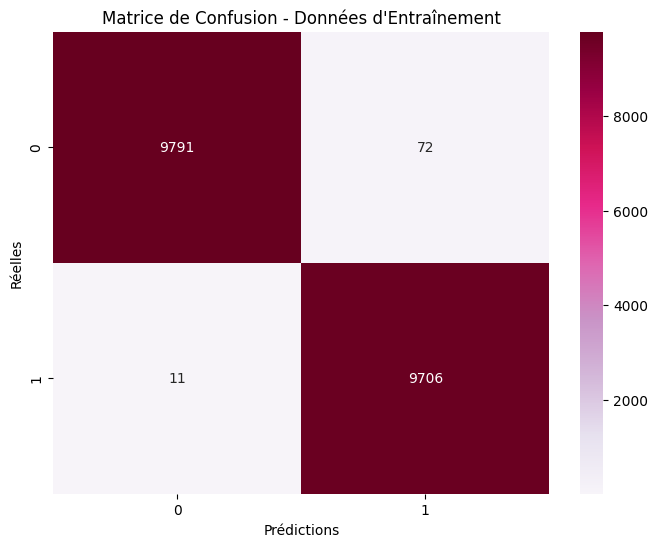

In [ ]:
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Train Accuracy: {accuracy_train}')# Calculer la matrice de confusion
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

# Afficher la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='PuRd', xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
plt.title('Matrice de Confusion - Données d\'Entraînement')
plt.xlabel('Prédictions')
plt.ylabel('Réelles')
plt.show()

.:. RandomForestClassifier: 87.61% .:.


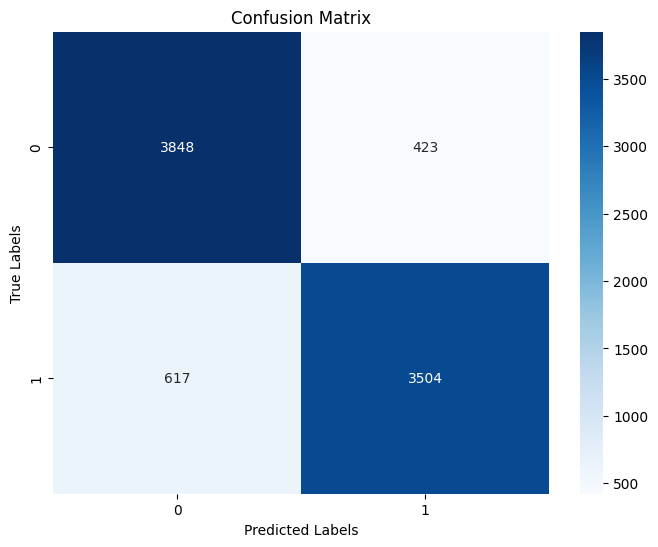

In [ ]:

RDAcc3 = accuracy_score(y_pred, y_test)
print('.:. RandomForestClassifier:'+'\033[1m {:.2f}%'.format(RDAcc3*100)+' .:.')
conf_matrix = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion à l'aide d'une heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
print(AB)
AB.fit(X_train_tfidf,y_train)
y_pred=AB.predict(X_test_tfidf)
print(classification_report(y_test,y_pred))

AdaBoostClassifier()
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4271
           1       0.90      0.82      0.86      4121

    accuracy                           0.87      8392
   macro avg       0.87      0.87      0.87      8392
weighted avg       0.87      0.87      0.87      8392



Train Accuracy: 0.9957609805924412


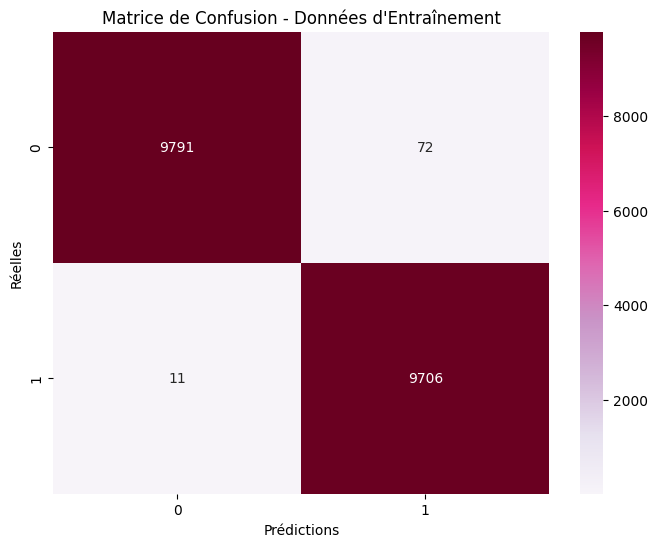

In [ ]:
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Train Accuracy: {accuracy_train}')
# Calculer la matrice de confusion
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

# Afficher la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='PuRd', xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
plt.title('Matrice de Confusion - Données d\'Entraînement')
plt.xlabel('Prédictions')
plt.ylabel('Réelles')
plt.show()

.:. AdaBoostClassifier Accuracy: 87.01% .:.


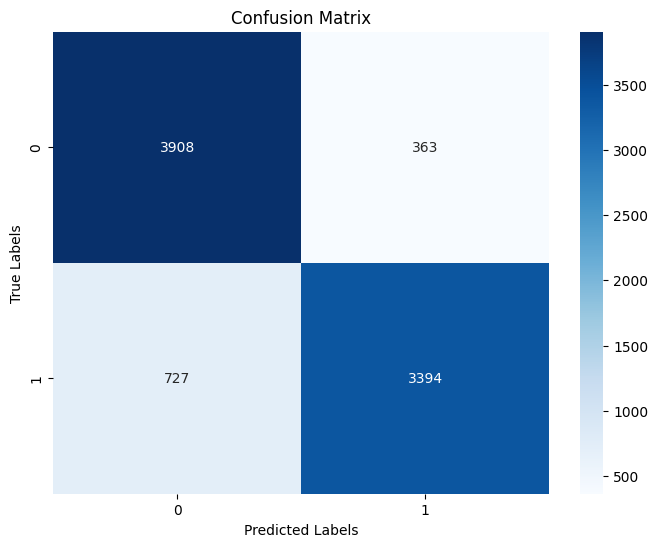

In [ ]:
ABAcc3 = accuracy_score(y_pred, y_test)
print('.:. AdaBoostClassifier Accuracy:'+'\033[1m {:.2f}%'.format(ABAcc3*100)+' .:.')
conf_matrix = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion à l'aide d'une heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
print('.:. TF-IDF Models Accuracy: .:.')
compare = pd.DataFrame({'Model': ['SVC','Random Forest' ,'AdaBoost'],'Accuracy': [SVcAcc1*100, RDAcc1*100, ABAcc1*100]})
# --- Create Accuracy Comparison Table ---
compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='GnBu').hide_index().set_properties(**{'font-family': 'Times New Roman'})

.:. TF-IDF Models Accuracy: .:.


<ipython-input-89-62da31aa5fe6>:4: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='GnBu').hide_index().set_properties(**{'font-family': 'Times New Roman'})


Model,Accuracy
SVC,91.873213
Random Forest,89.025262
AdaBoost,86.892278


In [ ]:
print('.:. Word2Vec Models Accuracy: .:.')
compare = pd.DataFrame({'Model': ['SVC','Random Forest' ,'AdaBoost'],'Accuracy': [SVCAcc2*100, RDAcc2*100, ABAcc2*100]})
# --- Create Accuracy Comparison Table ---
compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='GnBu').hide_index().set_properties(**{'font-family': 'Times New Roman'})

.:. Word2Vec Models Accuracy: .:.


<ipython-input-90-4ef1a4c4b85e>:4: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='GnBu').hide_index().set_properties(**{'font-family': 'Times New Roman'})


Model,Accuracy
Random Forest,76.811249
AdaBoost,75.703051
SVC,73.164919


In [ ]:
print('.:. TF-IDF N-grams Models Accuracy: .:.')
compare = pd.DataFrame({'Model': ['SVC','Random Forest' ,'AdaBoost'],'Accuracy': [SVcAcc3*100, RDAcc3*100, ABAcc3*100]})
# --- Create Accuracy Comparison Table ---
compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='GnBu').hide_index().set_properties(**{'font-family': 'Times New Roman'})

.:. TF-IDF N-grams Models Accuracy: .:.


<ipython-input-91-e332eadc2c46>:4: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='GnBu').hide_index().set_properties(**{'font-family': 'Times New Roman'})


Model,Accuracy
SVC,91.587226
Random Forest,87.607245
AdaBoost,87.011439
